In [1]:
import numpy as np
import lbg_forecast.nz as nz
import lbg_forecast.emulator as em
import lbg_forecast.hyperparameters as hyp
import lbg_forecast.population_model as pop
import lbg_forecast.priors_mass_func as pr
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import prospect.models.transforms as ts
import lbg_forecast.sfh as sfh

In [2]:
# initalise fsps emulator
model = em.fsps_emulator("/Users/fpetri/repos/LBGforecast")
bounds = hyp.hyperparameter_tighter()
nhypersamples = 50
hyperparameter_samples = np.vsplit(hyp.sample_prior_parameters(nhypersamples, bounds[0], bounds[1]), nhypersamples)
prior_data = pr.preload_prior_data(zmax=7.0)

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


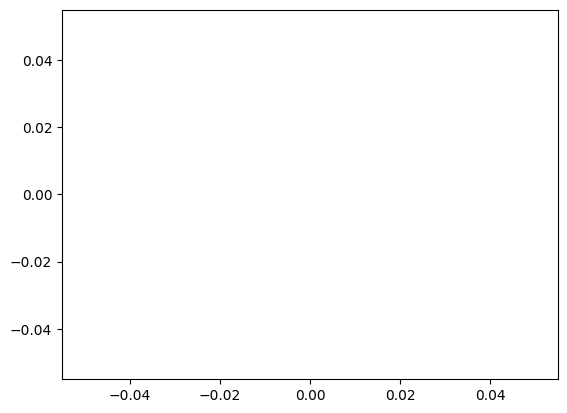

In [3]:
nsamples = 100000
nzs = []
spsp = []
for row in hyperparameter_samples:
    sps_params = pop.generate_sps_parameters(nsamples, row[0], prior_data, uniform_redshift_mass=False, uniform_logf=False)
    spsp.append(sps_params)

In [4]:
logsfrs = np.vstack(spsp)[:, 10:-1]
mass = np.vstack(spsp)[:, -1]

sfrs = []

i = 0
while(i < mass.shape[0]):
    sfrs.append(ts.logsfr_ratios_to_sfrs(np.log10(mass[i]), logsfrs[i, :], sfh.default_agebins()))
    i+=1

sfrs = np.array(sfrs)


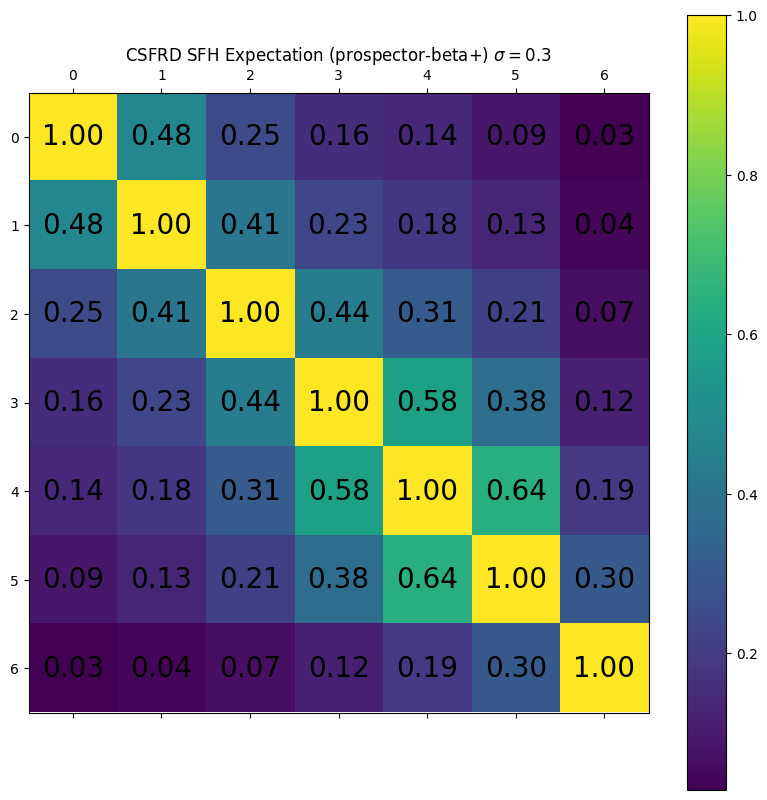

In [7]:
correlations = np.corrcoef(sfrs.T)

fig = plt.figure(figsize=(10,10))

plt.matshow(correlations, fignum=fig)

for (i, j), z in np.ndenumerate(correlations):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=20)

plt.title("CSFRD SFH Expectation (prospector-beta+) $\sigma=0.3$")
plt.colorbar()
plt.show()

In [9]:
#np.save("sfrs_burstiness.npy", sfrs)
#np.save("sps_burstiness.npy", spsp)

In [10]:
sfrs

array([[1.11762738e+01, 1.07268211e+01, 4.26921132e+00, ...,
        1.50150998e+00, 9.34815443e-01, 1.72501186e-02],
       [2.04786468e-02, 2.58578423e-02, 1.82629413e-03, ...,
        9.10462431e-04, 2.89998096e-04, 1.43188540e-05],
       [2.62820944e-02, 3.46798918e-02, 1.17684589e-02, ...,
        2.14058572e-03, 2.06182549e-04, 3.80655069e-04],
       ...,
       [3.94060278e-03, 4.25928219e-04, 1.01751938e-03, ...,
        2.99320518e-03, 1.14756604e-03, 1.05310218e-04],
       [2.61843876e-02, 3.64979193e-02, 1.44751303e-02, ...,
        2.56645120e-03, 1.11562928e-03, 2.77316775e-04],
       [4.90668956e-03, 9.26279122e-03, 2.87666904e-03, ...,
        1.53198664e-03, 7.67104071e-04, 3.03480866e-04]])

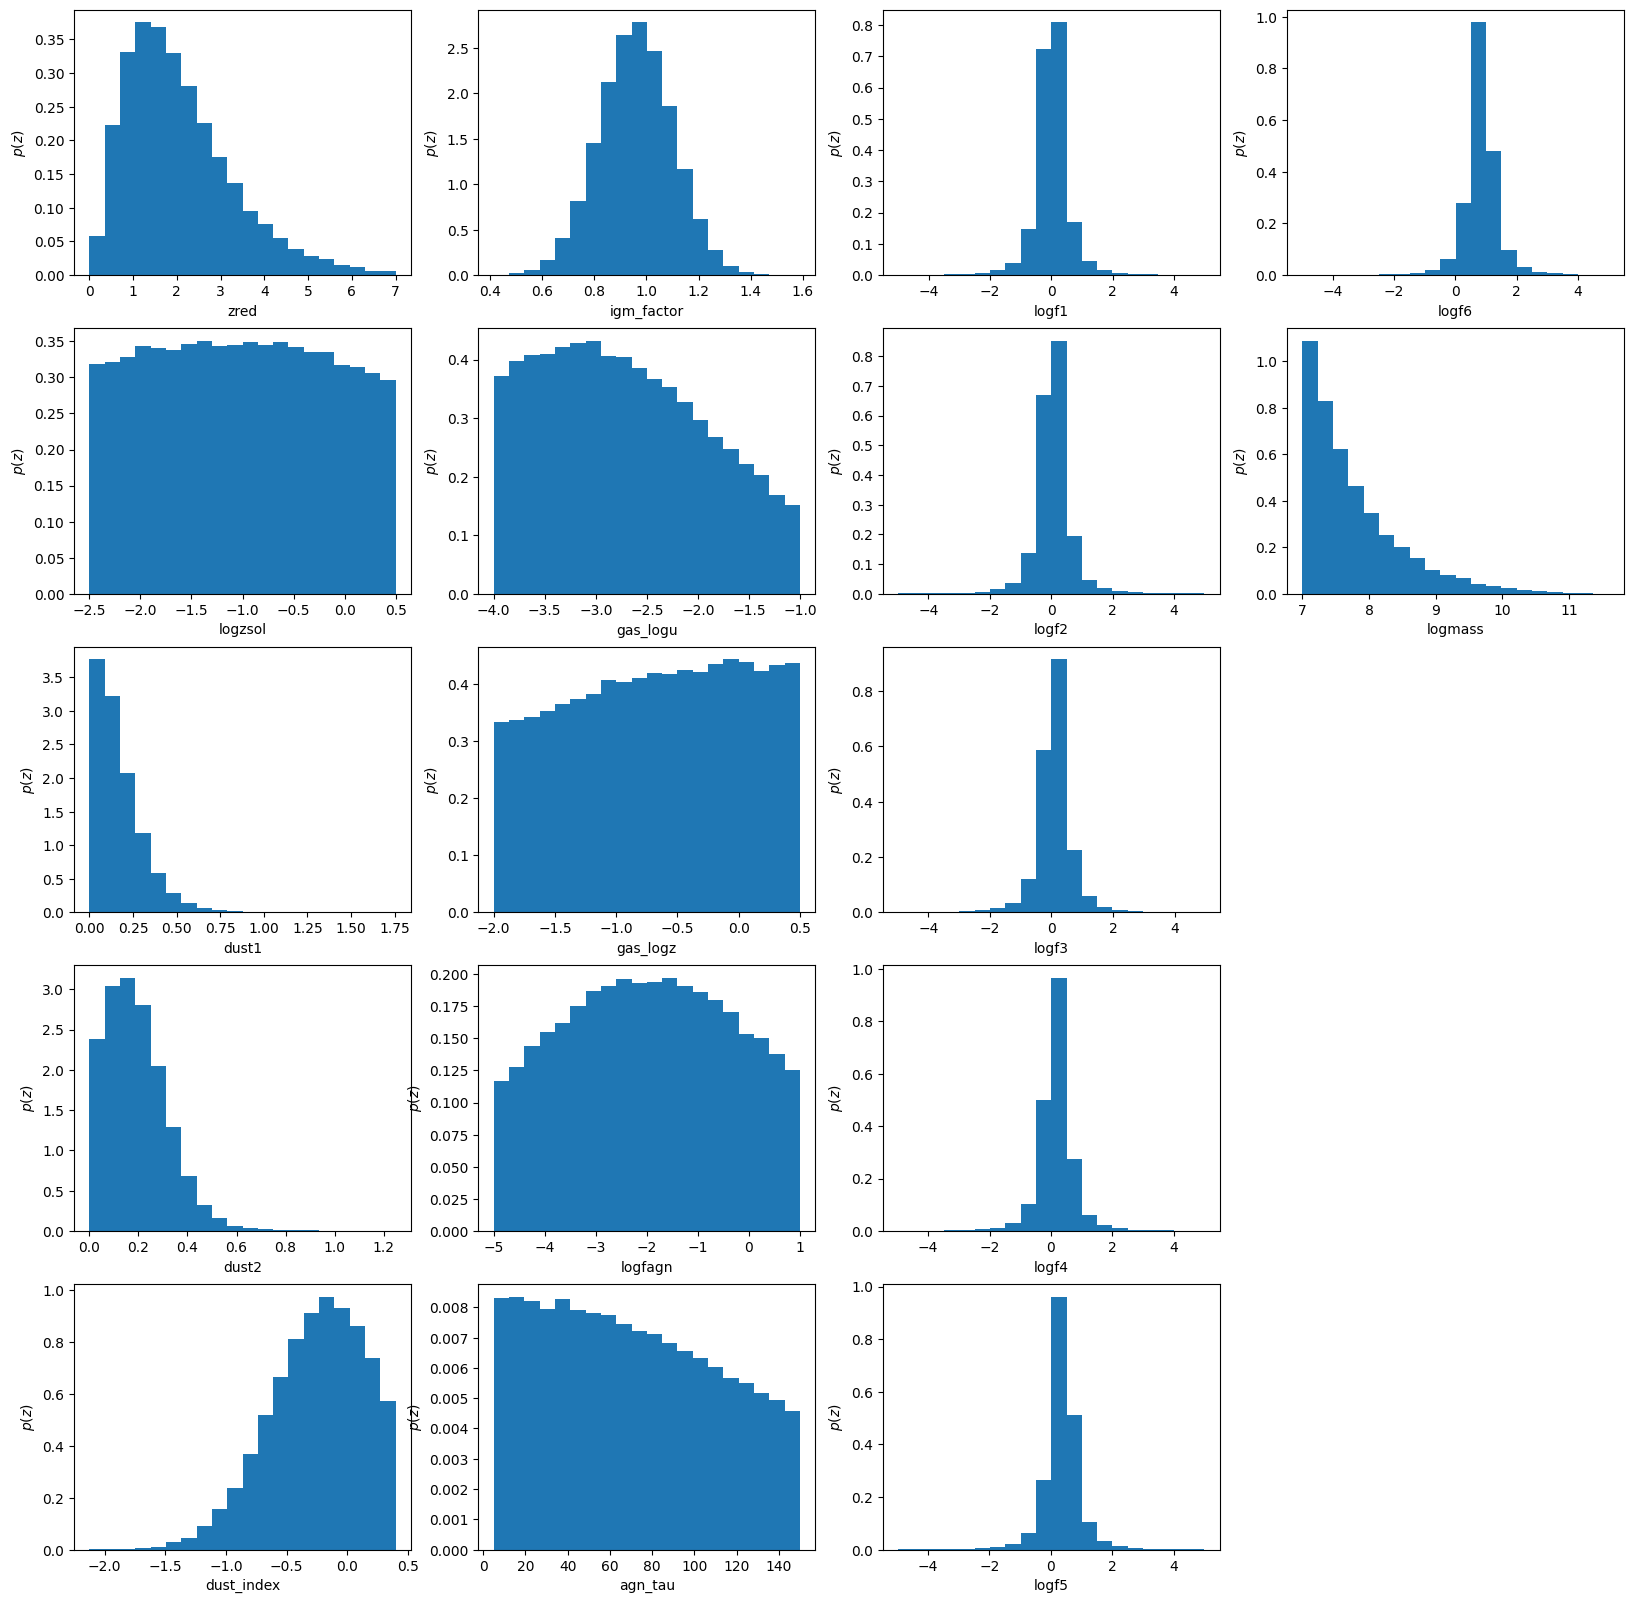

In [6]:
pop.plot_galaxy_population(sps_params)